### 第一題 [myknn_regressor]
(50%) K-nearest-neighbors (KNN) is a power method to construct nonparametric regression models. The goal of this question is to construct your own KNN regressor. To simplify the question, we are going to use the "brute-force" method to find nearest neighbors. That is, we are not going to use specialized data structures such as the K-D tree to speed up the process. Given a set of $ N $ training data points and a pre-defined hyper-parameter k, the prediction for a testing data point $ x_a $ is computed by locating $ k $ data points in the training data that is closest to $ x_a $. If the outcome values of the $ k $ nearest neighbors are $ y_a={y_1,y_2,...,y_k} $, then the prediction is $ f(y_a) $, where $ f $ is a real-valued function. We are going to consider two possible choices of $ f $. The first option is $ f(y_a) = \frac{1}{k} \sum_{i=1}^k y_i $.  This is referred to as the "equal-weight" case. The other option is to compute the mean after removing outliers. We define outliers as the data points that are outside of $ [Q1 − 1.5IQR, Q3 + 1.5IQR] $, where $ Q1 $ and $ Q3 $ are the first and third quantile of $ y_a $, and $ IQR = Q3−Q1 $. Since quantiles and IQR only make sense when there are enough neighbors, we allow the "remove_outliers" only if $ k>=10 $. If $ k<10 $, use the "equal_weight" $ f $ even if the user specify the other way.<br>

Creat a Python class named myknn_regressor that can do predictions given training data and hyper-parameters. It should take the $ k $ as the hyper-parameter for the number of neighbors. Moreover, the user can select $ f $ by passing "equal_weight" or "remove_outliers" to switch between the two possible cases for $ f $.<br>

**Dataset** <br>
We are going to use a subset of the "Million Songs Dataset" in this question. The dataset has been pre-processed and the training and testing dataset has been splitted and stored in a dictionary data structure. You can load the data from from msd_data1.pickle using pickle.load(). There are four elements in the dictionary: x_train, y_train, x_test, y_test. As indicated by their names, these four elements are training and testing data. The outcome variable (i.e. $ y $) is the year a song was released, and the features are variables that characterize the sound of a song. The goal is to predict the release year given sound features.

## Q1.1 Create your myknn_regressor.

### Class Design
<u>Attributes</u> : <br>
&emsp;__k__: the given hyper-parameter<br>
&emsp;**option**: can be either "equal_weight" or "option"<br>
&emsp;**X_train**: features of the training data, in the form of a numpy array of numpy arrays<br>
&emsp;**Y_train**: target values of the training data, in the form of a numpy array of scalars<br>

<u>Methods</u> : <br>
&emsp;**\_\_init\_\_(self, k, option="equal_weight")**: Constructor<br>
&emsp;&emsp;&emsp; Set self.k to k<br>
&emsp;&emsp;&emsp; Set self.option to option (according to the rules)<br>
&emsp;&emsp;&emsp; Set self.predicted_values to an empty list<br>
&emsp;**fit(self, X_train, Y_train)**: Record X_train and Y_train<br>
&emsp;&emsp;&emsp; Set self.X_train to X_train<br>
&emsp;&emsp;&emsp; Set self.Y_train to Y_train<br>
&emsp;**predict(self, X_test)**: predict the values of X_test based on self.X_train and self.Y_train, and store them in self.predicted_values<br>
&emsp;&emsp;&emsp;1. Find the k closest neighbors for each data point Xi (with 90 features each) in X_test, called Ni<br>
&emsp;&emsp;&emsp;2. Case1: self.option == "equal_weight": 將Ni所對應到的Yi值做平均，作為該Xi之預測值<br>
&emsp;&emsp;&emsp;3. Case2: self.option == "remove_outliers": 先篩掉outliers之後，再將Ni所對應到的Yi值做平均，作為該Xi之預測值<br>
&emsp;**distance(dp_1, dp_2)**: return the Euclidean distance between two data points, dp_1 and dp_2, calculated as follows.<br><br>
$$ distance(dp_1, dp_2) = \sqrt[2]{\sum_{i=0}^{n}(dp_1[i] - dp_2[i])^2} $$

In [7]:
import numpy as np
class myknn_regressor:
    
    def __init__(self, k, option="equal_weight"):
        self.k = k
        
        if option == "remove_outliers":
            if self.k < 10:
                option = "equal_weight"
        else:
            option = "equal_weight"
        
        self.option = option # either "equal_weight" or "remove_outliers"
    
    def fit(self, X_train, Y_train):
        """
        Record all training data, where Y_train is a numpy array of scalars and X_train is a numpy array of numpy arrays
        Thus, for each data point, we could think of it as taking the form of (Yi, Xi) = (5, np.array([3,7,9,1,...]))
        """
        self.X_train = X_train.copy()
        self.Y_train = Y_train.copy()
        
    
    def predict(self, X_test):
        # Create an empty list to be return later
        predicted_values = []
        
        ## Find the k closest neighbors for all data points Xi (with 90 features each) in X_test, called Ni
        for Xi in X_test:
            ## Compute "neighbors" = a list of (i, distance)
            ## i = 0 ~ 4999; distance = euclidean distance between Xi and its i-th neighor 
            neighbors = []
            for i, train in enumerate(self.X_train): # tuple unpacking
                element = (i, self.distance(Xi, train))
                neighbors.append(element)
            
            # Ni = Sort neighbors on the distance, pick top k ones, and cast to numpy array
            neighbors.sort(key=lambda x: x[1])
            Ni = np.array(neighbors[:self.k]) 
            
            if self.option == "equal_weight":
                ## 將Ni所對應到的Yi值做平均，作為該data point之predicted value
                prediction = np.mean([self.Y_train[int(i)] for i, dist in Ni])
                
            else: # self.option == "remove_outliers"
                Q1 = np.quantile(self.Y_train, 0.25)
                Q3 = np.quantile(self.Y_train, 0.75)
                IQR = Q3 - Q1
                ## 篩掉outliers之後，再將Ni所對應到的Yi值做平均，作為該data point之predicted value
                prediction = np.mean([self.Y_train[int(i)] for i, dist in Ni if Q1 - 1.5*IQR <= self.Y_train[int(i)] <= Q3 + 1.5*IQR])
                
            # end of for loop
            
            predicted_values.append(prediction)
            
        # end of for loop
        
        return np.array(predicted_values)
    
    @staticmethod
    def distance(dp_1, dp_2):
        """
        dp_1 and dp_2 are data points with 90 features each, represented in numpy arrays.
        Calculate their Euclidean Distance.
        """
        return sum((pair[0] - pair[1])**2 for pair in zip(dp_1, dp_2)) ** 0.5
    
    

In [1]:
# Sample Usage:
# myknn = myknn_regressor(20, "remove_outliers")
# myknn.fit(X_train, Y_train)
# ypred = myknn.predict(X_test)

#### Q1.2 Load data from msd_data1.pickle. You should standardized all feature values so that all features have a zero mean and a unit variance before training a KNN model. Make predictions using  k=20  and "equal_weight"  f . List the RMSE and the first 20 predictions in the testing data.

Steps:


In [3]:
import pickle
with open('msd_data1.pickle','rb') as f:
    data = pickle.load(f)

In [4]:
data['X_test'] # a numpy array of numpy arrays

array([[  38.51784,   55.38723,   10.31652, ...,    6.66624,  -73.75585,
           9.47857],
       [  44.7309 ,   46.25776,    8.55636, ...,    4.5564 ,   53.49956,
           5.39116],
       [  43.08912,   45.70197,   17.18467, ...,  -13.64909,   -7.42137,
          -4.97266],
       ...,
       [  39.81814,   62.12221,    6.60567, ...,   28.27807,  -60.00203,
         -11.19226],
       [  50.25968,   43.10325,   24.72866, ...,    2.71602,  -44.27226,
          -2.54583],
       [  41.39744,   -8.88692,  -20.15887, ...,    8.63798, -120.34024,
           3.65709]])

In [5]:
data['Y_test'] # a numpy array of scalars

array([1998., 1988., 2005., ..., 1990., 2005., 1989.])

In [8]:
# Standardize each feature in X_train and X_test
def standardize_features(X_arrays):
    """Standardize a numpy array of numpy arrays"""
    i = 0
    for feature in X_arrays.transpose():
        meanX = np.mean(feature)
        standard_deviationX = np.std(feature)

        # standardize each element in the i-th column
        tmp = map(lambda x: (x - meanX)/standard_deviationX,X_arrays[:,i])
        X_arrays[:,i] = np.array(list(tmp))
        i += 1

standardize_features(data['X_train'])
standardize_features(data['X_test'])

In [9]:
X_train, Y_train, X_test = data['X_train'], data['Y_train'], data['X_test']
myknn = myknn_regressor(20, "equal_weight")
myknn.fit(X_train, Y_train)
ypred = myknn.predict(X_test)

In [10]:
ypred

[1992.9,
 1994.05,
 2000.05,
 1991.5,
 1992.8,
 1998.5,
 1987.1,
 1990.9,
 2001.8,
 2003.0,
 2001.15,
 1998.65,
 1995.55,
 1997.2,
 1995.05,
 1997.35,
 1992.15,
 1999.1,
 2003.6,
 1995.75,
 2003.4,
 1999.95,
 2001.75,
 2000.25,
 2001.0,
 1994.6,
 1993.15,
 1994.65,
 2002.65,
 1996.25,
 1998.45,
 2001.95,
 1999.4,
 2000.65,
 1990.55,
 2004.0,
 2001.0,
 1999.55,
 1993.2,
 2001.7,
 1997.1,
 1998.5,
 2000.05,
 1998.85,
 1999.7,
 1999.35,
 2001.55,
 2003.95,
 1991.5,
 1995.15,
 2000.25,
 1985.5,
 2002.85,
 1997.65,
 1996.9,
 1990.6,
 1999.95,
 1997.95,
 1996.95,
 1990.15,
 2002.65,
 2002.75,
 1988.7,
 1995.05,
 2002.8,
 1999.85,
 1999.7,
 2001.65,
 1995.15,
 1999.5,
 1992.7,
 1998.5,
 2000.55,
 1999.4,
 1998.9,
 1996.85,
 1996.4,
 1988.4,
 1996.5,
 1997.35,
 2001.05,
 1994.5,
 2001.85,
 2002.4,
 1996.75,
 1995.85,
 2001.0,
 1995.4,
 1993.35,
 1995.35,
 2002.3,
 1999.15,
 2001.8,
 1999.95,
 2002.45,
 1997.35,
 2003.8,
 1998.85,
 1996.25,
 2003.0,
 2000.6,
 2001.8,
 1992.8,
 1999.95,
 2003.15

In [12]:
Y_test = data['Y_test']
RMSE = np.mean([(pred - test)**2 for pred, test in zip(ypred, Y_test)]) ** 0.5

#### Print the RMSE and the first 20 predictions

In [13]:
print(RMSE)
print(ypred[:20])

10.292158827638316
[1992.9, 1994.05, 2000.05, 1991.5, 1992.8, 1998.5, 1987.1, 1990.9, 2001.8, 2003.0, 2001.15, 1998.65, 1995.55, 1997.2, 1995.05, 1997.35, 1992.15, 1999.1, 2003.6, 1995.75]


#### Q1.3 Load data from msd_data1.pickle. Standardized all feature values so that all features have a zero mean and unit variance. Make predictions using  k=20  and "remove_outier"  f . List the RMSE and the first 20 predictions in the testing data.

In [16]:
myknn = myknn_regressor(20, "remove_outliers")
myknn.fit(X_train, Y_train)
ypred_rm_outliers = myknn.predict(X_test)

In [17]:
RMSE_rm_outliers = np.mean([(pred - test)**2 for pred, test in zip(ypred, Y_test)]) ** 0.5

#### Print the RMSE_rm_outliers and the first 20 predictions

In [18]:
print(RMSE_rm_outliers)
print(ypred_rm_outliers[:20])

10.292158827638316
[2001.35714286 1994.05       2000.05       1992.73684211 1993.73684211
 2001.38888889 1992.53333333 1997.6        2001.8        2003.
 2001.15       1998.65       2000.875      1997.2        2000.05882353
 1997.35       1999.8        2004.23529412 2003.6        1996.94736842]


### 第二題 [Tuning the Hyper-parameter]
(50%) We are going to explore the issue of hyper-parameter tuning in this question. We are going to consider three cases in this question. Use the knn regressor from klearn.neighbors.KNeighborsRegressor for the first two cases, and your own myknn_regressor for the third cases.

For each case, use the data from msd_data1.pickle to train and test the KNN models. Compute the RMSE on the testing dataset using  k=1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200 . In the first case, all feature values are standardize to have unit variances and zero means. As for the second case, do not apply feature scaling. The third case use standardized feature and adopted myknn_regressor with "remove_outlier"  f  to make prediction.

For each case, plot a curve that shows the relations between  k  (x-axis) and RMSE (y-axis). If possible, plot the three curves in the same figure so that we can visually inspect their dynamics. Discuss your observations.

In [28]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
%matplotlib inline

##### Note that RMSE are calculated as follows:
$$RMSE = \sqrt{\frac{1}{n} \sum_{i=0}^{n}(\widehat{y_i} - y_i)^2}$$

##### Case 1: Use the knn regressor from sklearn.neighbors.KNeighborsRegressor; all feature values are standardized

In [52]:
import pickle
with open('msd_data1.pickle','rb') as f:
    data = pickle.load(f)

In [53]:
standardize_features(data['X_train'])
standardize_features(data['X_test'])

In [54]:
k_list_1, RMSE_list_1 = [], []
for k in (1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200):
    # Create and train the knn model
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(data['X_train'], data['Y_train'])
    ypred = knn.predict(data['X_test']) # the predictions (result) are saved as a numpy array in ypred
    
    # Calculate the RMSE using the above formula
    RMSE = np.mean([(pred - test)**2 for pred, test in zip(ypred, Y_test)]) ** 0.5
    
    # Record the current k and RMSE
    k_list_1.append(k)
    RMSE_list_1.append(RMSE)

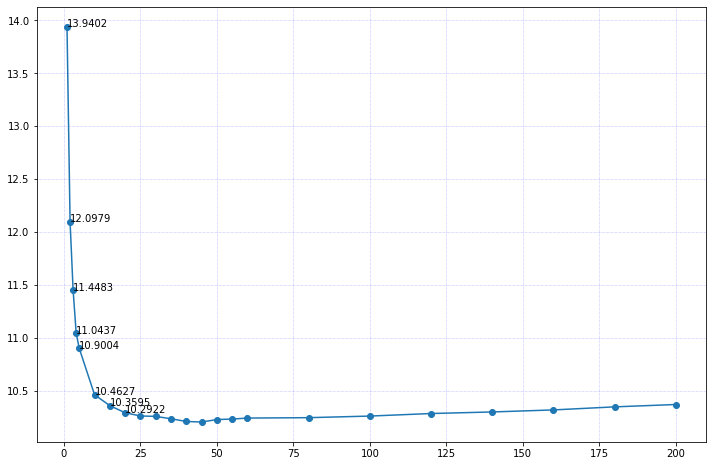

In [55]:
fig, axes = plt.subplots(figsize=(12,8))
axes.plot(k_list_1, RMSE_list_1, marker='o')
axes.grid(color='b', alpha=0.5, linestyle=':', linewidth=0.5)

for i_x, i_y in zip(k_list_1[:8], RMSE_list_1[:8]):
    plt.text(i_x, i_y, f'{i_y:.4f}')

##### Case 2: Use the knn regressor from sklearn.neighbors.KNeighborsRegressor; no feature scaling are applied

In [56]:
import pickle
with open('msd_data1.pickle','rb') as f:
    data = pickle.load(f)

In [57]:
k_list_2, RMSE_list_2 = [], []
for k in (1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200):
    # Create and train the knn model
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(data['X_train'], data['Y_train'])
    ypred = knn.predict(data['X_test']) # the predictions (result) are saved as a numpy array in ypred
    
    # Calculate the RMSE
    RMSE = np.mean([(pred - test)**2 for pred, test in zip(ypred, Y_test)]) ** 0.5
    
    # Record the current k and RMSE
    k_list_2.append(k)
    RMSE_list_2.append(RMSE)

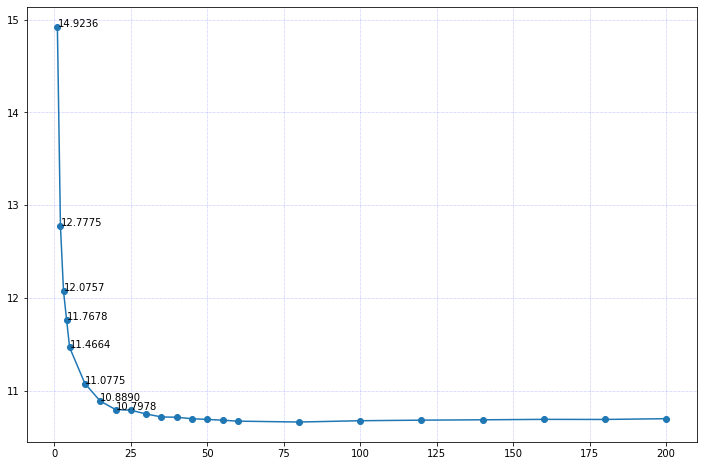

In [58]:
fig, axes = plt.subplots(figsize=(12,8))
axes.plot(k_list_2, RMSE_list_2, marker='o')
axes.grid(color='b', alpha=0.5, linestyle=':', linewidth=0.5)

for i_x, i_y in zip(k_list_2[:8], RMSE_list_2[:8]):
    plt.text(i_x, i_y, f'{i_y:.4f}')

##### Case 3: Use my own myknn_regressor with "remove_outliers"; all features are standardized

In [59]:
import pickle
with open('msd_data1.pickle','rb') as f:
    data = pickle.load(f)

In [60]:
standardize_features(data['X_train'])
standardize_features(data['X_test'])

In [61]:
k_list_3, RMSE_list_3 = [], []
for k in (1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200):
    # Create and train the knn model
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(data['X_train'], data['Y_train'])
    ypred = knn.predict(data['X_test']) # the predictions (result) are saved as a numpy array in ypred
    
    # Calculate the RMSE
    RMSE = np.mean([(pred - test)**2 for pred, test in zip(ypred, Y_test)]) ** 0.5
    
    # Record the current k and RMSE
    k_list_3.append(k)
    RMSE_list_3.append(RMSE)

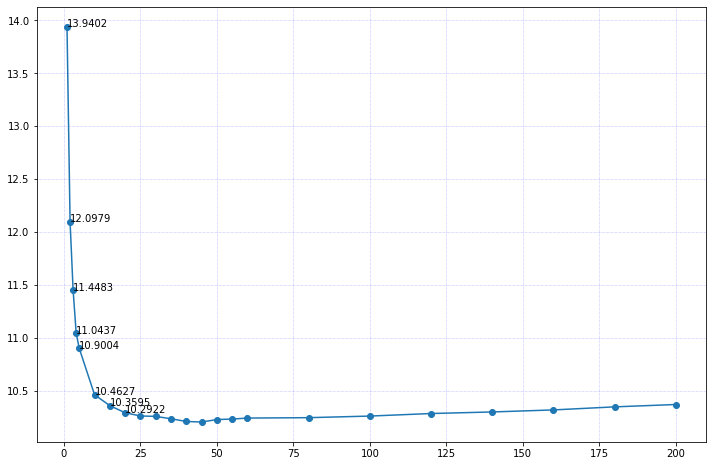

In [62]:
fig, axes = plt.subplots(figsize=(12,8))
axes.plot(k_list_3, RMSE_list_3, marker='o')
axes.grid(color='b', alpha=0.5, linestyle=':', linewidth=0.5)

for i_x, i_y in zip(k_list_3[:8], RMSE_list_3[:8]):
    plt.text(i_x, i_y, f'{i_y:.4f}')

### Discussion: 
#### Plot all cases together

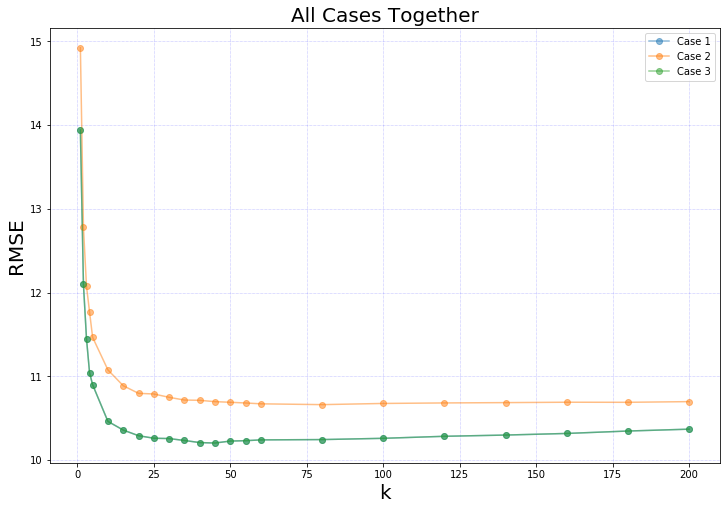

In [84]:
fig, axes = plt.subplots(figsize=(12,8))
axes.set_title('All Cases Together', size=20)
axes.set_xlabel('k', size=20)
axes.set_ylabel('RMSE', size=20)
axes.plot(k_list_1, RMSE_list_1, marker='o', alpha=0.5, label='Case 1')
axes.plot(k_list_2, RMSE_list_2, marker='o', alpha=0.5, label='Case 2')
axes.plot(k_list_3, RMSE_list_3, marker='o', alpha=0.5, label='Case 3')
axes.grid(color='b', alpha=0.5, linestyle=':', linewidth=0.5)
axes.legend()

##### We can see that case 1 is "missing", which means the plot of case 1 overlaps either that of case 2 or case 3. Let's find out!

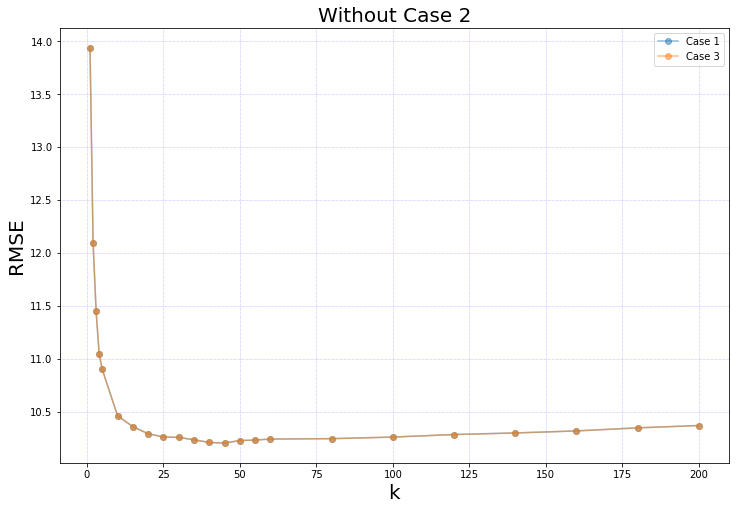

In [86]:
fig, axes = plt.subplots(figsize=(12,8))
axes.set_title('Without Case 2', size=20)
axes.set_xlabel('k', size=20)
axes.set_ylabel('RMSE', size=20)
axes.plot(k_list_1, RMSE_list_1, marker='o', alpha=0.5, label='Case 1')
# axes.plot(k_list_2, RMSE_list_2, marker='o', alpha=0.5, label='Case 2') # Case 2 is NOT plotted
axes.plot(k_list_3, RMSE_list_3, marker='o', alpha=0.5, label='Case 3')
axes.grid(color='b', alpha=0.5, linestyle=':', linewidth=0.5)
axes.legend()

##### By now, we can see that case 1 and case 3 performs nearly the same.

### Observation:
Recall that:<br>
&emsp;&emsp;&emsp;<u>Case 1</u>: Use the knn regressor from sklearn.neighbors.KNeighborsRegressor; features are standardized<br>
&emsp;&emsp;&emsp;<u>Case 2</u>: Use the knn regressor from sklearn.neighbors.KNeighborsRegressor; no feature scaling are applied<br>
&emsp;&emsp;&emsp;<u>Case 3</u>: Use my own myknn_regressor (with "remove_outliers"); features are standardized<br><br>
**<u>Observation 1</u>**:<br>
Judging from the fact that case 1 and case 3 performs nearly the same, we can conclude that **using the knn regressor from scikit-learn is the same as using my own knn_regressor** in terms of performance evaluated by RMSE.<br><br>
**<u>Observation 2</u>**:<br>
Comparing case 2 with case 1, we can conclude that **feature standardization is important**, because with this preprocessing phase, the RMSE of case 1 is much smaller than that of case 2.<br><br>
**<u>Observation 3</u>**:<br>
For all cases, **the RMSE hits its minimum** (and the model is optimized) when the hyper-parameter **k takes a value from 20 to 50.**<br><br>
**<u>Observation 4</u>**:<br>
For all cases, when the hyper-parameter k is greater than 80, **the model starts to perform slightly worse as k grows larger**.